### About Plotly

Plotly is a Data Visualization library by the company Plotly based out of Canada with support in languages such as Python, Js, Julia etc.

#### Advantages

- Multi language support
- Lot's of graphs
- Interactive plots
- Beautiful plots

Does not work with live data streams. Dash can be explored for that.

### The Plotly Roadmap

- Plotly Go
- Plotly Express
- Dash

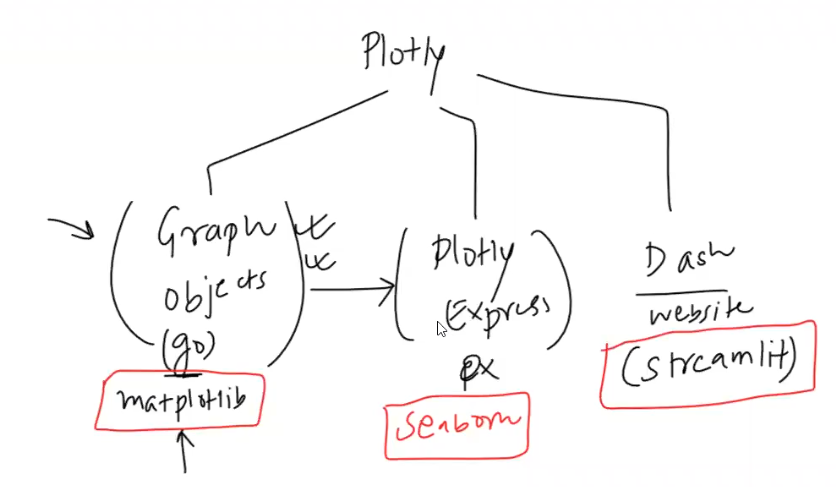

### Working with Plotly Go

In [2]:
# import the libraries
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import plotly.express as px

In [3]:
# import datasets
tips = px.data.tips()
iris = px.data.iris()
gap = px.data.gapminder()

In [7]:
gap.shape

(1704, 8)

In [3]:
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [4]:
# scatter plot using plotly go
temp_df = gap[gap['year'] == 2007]
temp_df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [46]:
afghanistan = gap[gap['country'] == 'Afghanistan']

In [62]:
afghanistan

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,AFG,4
6,Afghanistan,Asia,1982,39.854,12881816,978.011439,AFG,4
7,Afghanistan,Asia,1987,40.822,13867957,852.395945,AFG,4
8,Afghanistan,Asia,1992,41.674,16317921,649.341395,AFG,4
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,AFG,4


In [50]:

trace1 = go.Scatter(x=afghanistan['year'],y=afghanistan['gdpPercap'],mode='markers')

data = [trace1]

layout = go.Layout(title='Year Vs GDP per Capita of Afghanistan', xaxis={'title':'Year'},yaxis={'title':'Gdp Percapita (Afghanistan)'})
fig = go.Figure(data,layout)

fig.show()

In [14]:

trace1 = go.Scatter(x=temp_df['lifeExp'],y=temp_df['gdpPercap'],mode='markers')
trace2 = go.Scatter(x=[0,1,2],y=[0,90,30000],mode='lines')

data = [trace1,trace2]

layout = go.Layout(title='Life Exp Vs GDP per Capita for 2007', xaxis={'title':'Life Exp'},yaxis={'title':'GDP'})
fig = go.Figure(data,layout)

fig.show()

The above code you have seen was quite cluttered, we have to first create traces and then put them into data and then add into the layout, which is a bit hassle to draw a graph everytime, this is where `plotly express` comes in handy

In [65]:
px.scatter(afghanistan, x='year',y='gdpPercap',color='lifeExp',title='Year Vs GDP per capita')

In [57]:
# plot life exp and gdp scatter plot -> continent as color -> pop as size -> hover name -> range_x/range_y -> log_x/log_y
px.scatter(temp_df, x='lifeExp', y='gdpPercap',color='continent',size='pop',size_max=100, hover_name='country')

In [6]:
# plot animation of the above curve on the basic of year
px.scatter(gap, x='lifeExp', y='gdpPercap',
           color='continent',size='pop',
           size_max=100, hover_name='country',
           animation_frame='year',
           range_x=[30,95],animation_group='country')

In [72]:
# line plot
# plot india pop line plot
temp_df = gap[gap['country'] == 'India']

px.line(temp_df, x='year', y='pop',title='India population growth')

In [125]:
# plot line plot of different countries
temp_df = gap[gap['country'].isin(['India','China','Pakistan','Afghanistan','France'])].pivot(index='year',columns='country',values='lifeExp')
temp_df

country,Afghanistan,China,France,India,Pakistan
year,,,,,
1952,28.801,44.00000,67.410,37.373,43.436
1957,30.332,50.54896,68.930,40.249,45.557
1962,31.997,44.50136,70.510,43.605,47.670
1967,34.020,58.38112,71.550,47.193,49.800
1972,36.088,63.11888,72.380,50.651,51.929
1977,38.438,63.96736,73.830,54.208,54.043
1982,39.854,65.52500,74.890,56.596,56.158
1987,40.822,67.27400,76.340,58.553,58.245
1992,41.674,68.69000,77.460,60.223,60.838


In [126]:
px.line(temp_df, x=temp_df.index, y=temp_df.columns,title='Life Expectency over the years')

In [127]:
# bar chart
# india's pop over the years
temp_df = gap[gap['country'] == 'India']
px.bar(temp_df,x='year',y='pop',text_auto=True)

In [128]:
# pop comp of 3 countries
temp_df = gap[gap['country'].isin(['India','China','Pakistan'])].pivot_table(index='year',columns='country',values='gdpPercap',aggfunc='sum')
temp_df

country,China,India,Pakistan
year,,,
1952,400.448611,546.565749,684.597144
1957,575.987001,590.061996,747.083529
1962,487.674018,658.347151,803.342742
1967,612.705693,700.770611,942.408259
1972,676.900092,724.032527,1049.938981
1977,741.237470,813.337323,1175.921193
1982,962.421381,855.723538,1443.429832
1987,1378.904018,976.512676,1704.686583
1992,1655.784158,1164.406809,1971.829464


In [129]:
# grouped bar chart -> text_auto
px.bar(temp_df,x=temp_df.index,y=temp_df.columns,barmode='group',text_auto=True)

In [130]:
px.bar(temp_df,x=temp_df.index,y=temp_df.columns,barmode='group',log_y=True,text_auto=True)

In [136]:
# stacked bar chart
# pop contribution per country to a continents pop stacked for a particular year(2007)
temp_df = gap[gap['year'] == 2007]
px.bar(temp_df, x='continent', y='pop', color='country',hover_name='country')

In [9]:
# bar chart animation
px.bar(gap, x='continent',y='pop',color='continent',animation_frame='year',animation_group='country',range_y=[0,4000000000])

In [11]:
px.bar(gap, x='continent',y='gdpPercap',color='continent',animation_frame='year',animation_group='country',range_y=[0,1000000])

In [17]:
# histogram
# plot histogram of life expt of all countries in 2007 -> nbins -> text_auto
temp_df = gap[gap['year'] == 2007]

px.histogram(temp_df, x='lifeExp',nbins=10,text_auto=True,color='continent',hover_name='country')

In [147]:
# plot histogram of sepal length of all iris species
px.histogram(iris,x='sepal_length',color='species',nbins=30,text_auto=True)

In [21]:
# Pie -> values -> names
# find the pie chart of gdpPercap of european countries in 2007

temp_df = gap[(gap['year'] == 2007) & (gap['continent'] == 'Europe')]

px.pie(temp_df, values='gdpPercap', names='country',hover_name='country')

In [157]:
# plot pie chart of world pop in 1952 continent wise ->  -> explode(pull)

temp_df = gap[gap['year'] == 1952].groupby('continent')['pop'].sum().reset_index()
px.pie(temp_df, values='pop', names='continent')

In [160]:
# Sunburst plot -> Sunburst plots visualize hierarchical data spanning outwards radially from root to leaves. -> color
# path -> [], values

temp_df = gap[gap['year'] == 2007]

px.sunburst(temp_df, path=['continent','country'],values='pop',color='gdpPercap')

In [163]:
px.sunburst(tips,path=['sex','smoker','day','time'],values='total_bill',color='size')

In [171]:
# Treemap
temp_df = gap[gap['year'] == 2007]

px.treemap(gap, path=[px.Constant('World'),'continent','country'],values='pop',color='lifeExp')

In [173]:
# Heatmap -> find heatmap of all continents with year on avg life exp
# temp_df = tips.pivot_table(index='day',columns='sex',values='total_bill',aggfunc='sum')

temp_df = gap.pivot_table(index='year',columns='continent',values='lifeExp',aggfunc='mean')
px.imshow(temp_df)

In [176]:
# 3d scatterplot
# plot a 3d scatter plot of all country data for 2007
temp_df = gap[gap['year'] == 2007]
px.scatter_3d(temp_df, x='lifeExp',y='pop',z='gdpPercap',log_y=True,color='continent',hover_name='country')

In [177]:
px.scatter_3d(iris,x='sepal_length',y='sepal_width',z='petal_length',color='species')

In [178]:
# scatter_matrix -> dimensions
px.scatter_matrix(iris,dimensions=['sepal_length','sepal_width','petal_length','petal_width'],color='species')

In [1]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

#### Facet Plot

We can plot multiple graphs inside a single graph, that single graph in known as facet plot

It is applicable to every function till now we have learned

In [2]:
# facet plot
tips = px.data.tips()
gap = px.data.gapminder()

In [6]:
px.scatter(tips, x='total_bill', y='tip', facet_col='smoker', facet_row='sex',color='time')

In [181]:
px.histogram(tips,x='total_bill',facet_row='sex')

In [15]:
px.scatter(gap, x='lifeExp', y='gdpPercap', facet_col='year', facet_col_wrap=3,color='continent')

In [24]:
# 3d Surface plot
# can not be created using Plotly express
# we will use plotly graph object -> go

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

xx, yy = np.meshgrid(x,y)

# z = xx**2 + yy**2
# z = np.cosh(xx) + np.tanh(yy)
# z = np.sqrt(xx**2 + yy**2)
z = np.sqrt(1 - xx**2 - yy**2)


trace = go.Surface(x=x,y=y,z=z)

data = [trace]

layout = go.Layout(title='3D Surface Plot')

fig = go.Figure(data,layout)

fig.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_20020\3355559085.py:13: RuntimeWarning:

invalid value encountered in sqrt



In [25]:
# Contour plot
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

xx, yy = np.meshgrid(x,y)

# z = xx**2 + yy**2
# z = np.sin(xx) + np.cos(yy)
z = np.sqrt(xx**2 + yy**2)


trace = go.Contour(x=x,y=y,z=z)

data = [trace]

layout = go.Layout(title='3D Surface Plot')

fig = go.Figure(data,layout)

fig.show()

In [26]:
# Subplots
from plotly.subplots import make_subplots

In [30]:
fig = make_subplots(rows=1,cols=2)

In [32]:
fig.add_trace(
    go.Scatter(x=[1,9,5],y=[2,10,1]),
    row = 1,
    col = 1
)
fig.add_trace(
    go.Histogram(x=[1,9,5,22,109,134,56,78,12,34,89]),
    row = 1,
    col = 2
)

fig.update_layout(title='Subplot in plotly')
fig.show()

In [27]:
fig = make_subplots(rows=2,cols=2)

In [29]:
fig.add_trace(
    go.Scatter(x=[1,9,5],y=[2,10,1]),
    row = 1,
    col = 1
)

fig.add_trace(
    go.Histogram(x=[1,9,5,22,109,134,56,78,12,34,89]),
    row = 1,
    col = 2
)

fig.add_trace(
    go.Scatter(x=[1,9,5],y=[2,10,1]),
    row = 2,
    col = 1
)

fig.add_trace(
    go.Histogram(x=[1,9,5,22,109,134,56,78,12,34,89]),
    row = 2,
    col = 2
)

fig.update_layout(title='Subplot Demo')

fig.show()
